C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  base_final = pd.concat([ind_2004_mdp[comunes], ind_2024_mdp[comunes]], ignore_index=True)
C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  base_final['EDAD2'] = base_final['CH06']**2


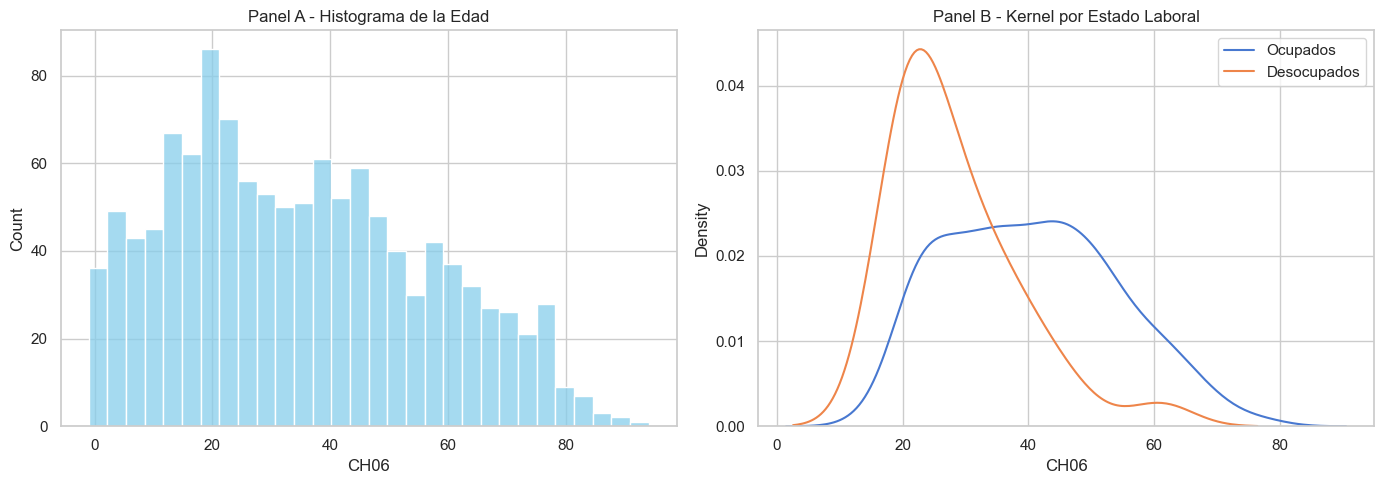

C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:89: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  base_final['EDUC'] = base_final.apply(calcular_educ, axis=1)
C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  base_final['P21_CORREGIDO'] = np.where(base_final['AÑO'] == 2004, base_final['P21'] * factor_conversion, base_final['P21'])
C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:95: PerformanceWarning: DataFrame is highly fragmented.  

count    465.000000
mean       9.466667
std        7.532077
min        0.000000
25%        3.000000
50%       12.000000
75%       14.000000
max      111.000000
Name: EDUC, dtype: float64


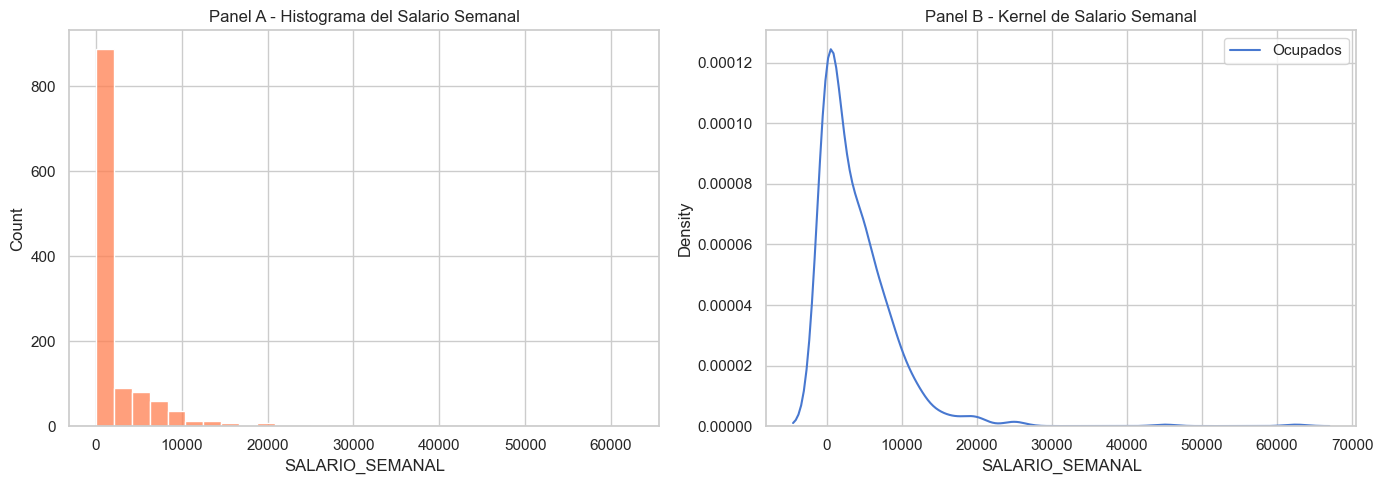

C:\Users\Wally\AppData\Local\Temp\ipykernel_16968\3217124588.py:109: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  base_final['HORASTRAB'] = base_final['PP3E_TOT'].fillna(0) + base_final['PP3F_TOT'].fillna(0)


count    1193.000000
mean       16.805532
std        21.692615
min         0.000000
25%         0.000000
50%         0.000000
75%        36.000000
max        90.000000
Name: HORASTRAB, dtype: float64
       Observaciones  Con NaN en ESTADO  Ocupados  Desocupados  \
2004               0                  0         0            0   
2024            1193                  0       576           29   
Total           1193                  0       576           29   

       Variables homogenizadas  
2004                       178  
2024                       178  
Total                      178  


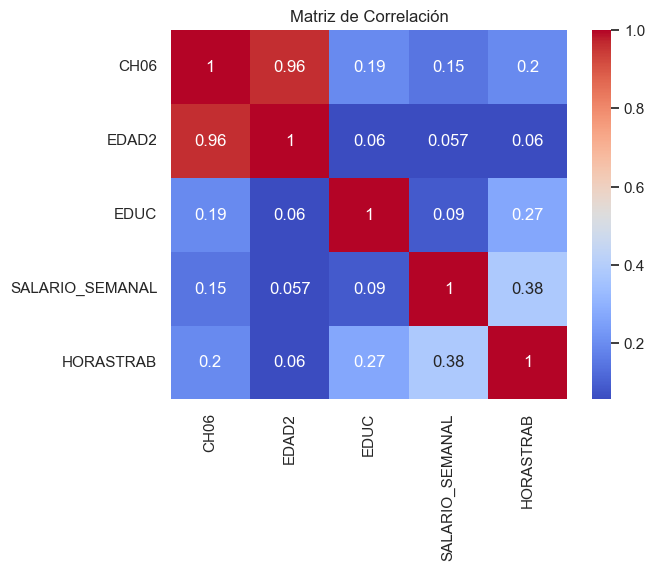

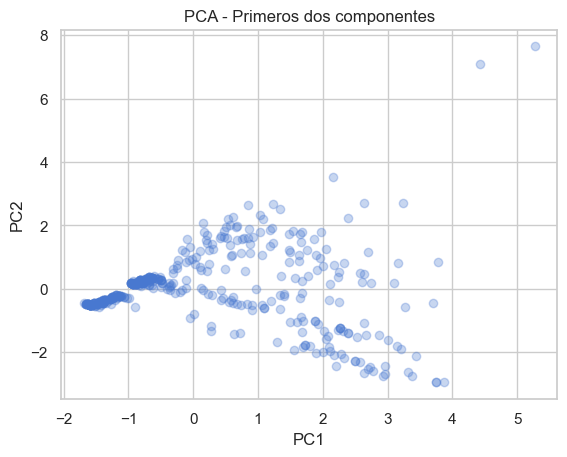

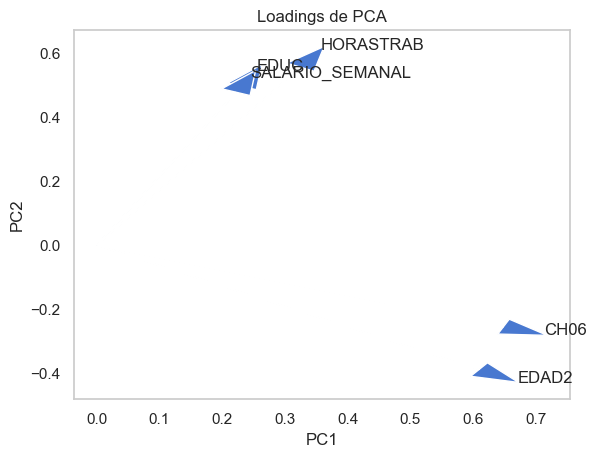

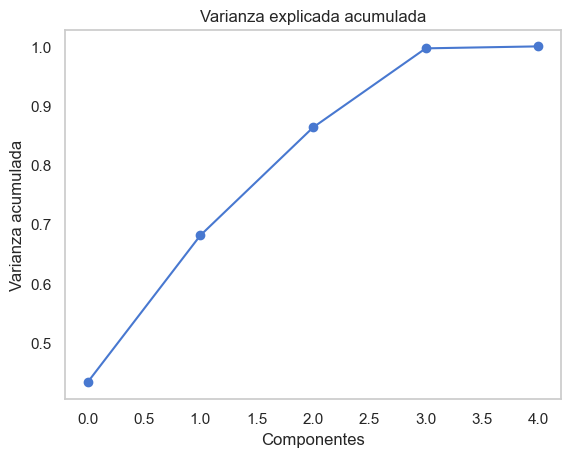

C:\Users\Wally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


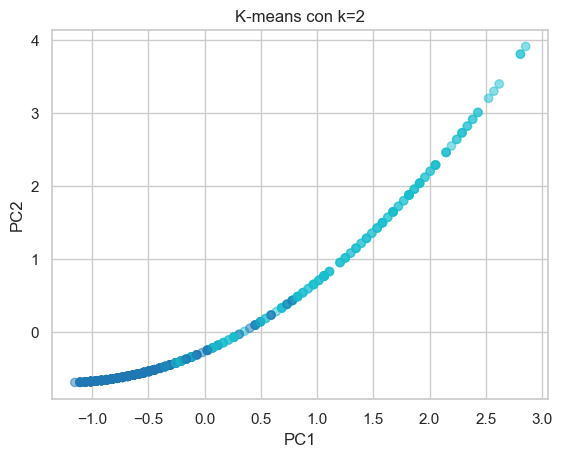

C:\Users\Wally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


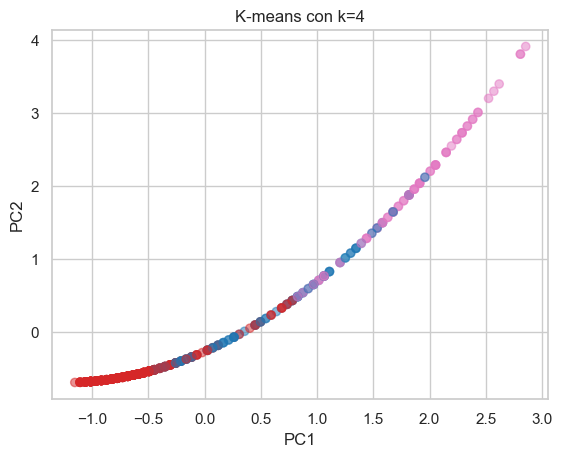

C:\Users\Wally\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


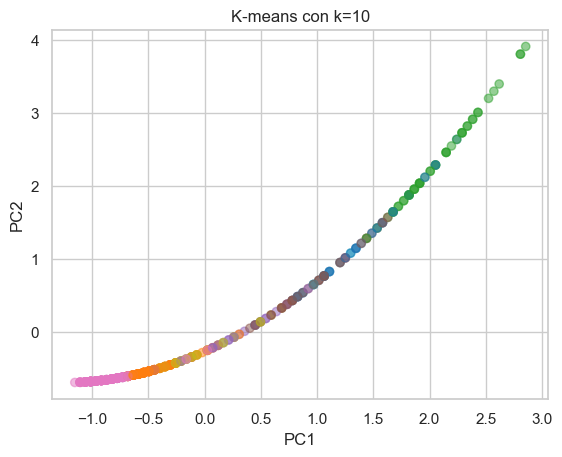

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 4        NaN
6        NaN
7       blue
8        NaN
9        NaN
        ... 
1187     NaN
1188     NaN
1189     NaN
1190     NaN
1192     NaN
Name: ESTADO, Length: 465, dtype: object

In [1]:
# Trabajo Práctico 3 - Big Data & Machine Learning (UBA)
# Análisis de la EPH - Mar del Plata (2004 y 2024)

# ---------------------------------------------
# PARTE I: Carga, limpieza y creación de variables
# ---------------------------------------------

# 0. Importación de librerías y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline
sns.set(style='whitegrid', palette='muted')

# Rutas actualizadas para tu PC
path_2004 = r"C:\\Users\\Wally\\Desktop\\Carpeta 2025\\TP prueba 1\\Primer cuatrimestre 2004\\Formato .dta"
path_2024 = r"C:\\Users\\Wally\\Desktop\\Carpeta 2025\\TP prueba 1\\Primer cuatrimestre 2024\\Formato .xls"

# Carga de datos
hogares_2004 = pd.read_stata(f"{path_2004}\\Hogar_t104.dta")
individuos_2004 = pd.read_stata(f"{path_2004}\\Individual_t104.dta")

hogares_2024 = pd.read_excel(f"{path_2024}\\usu_hogar_T124.xlsx")
individuos_2024 = pd.read_excel(f"{path_2024}\\usu_individual_T124.xlsx")

# 1. Filtrado por Mar del Plata
df_2024 = individuos_2024.copy()
df_2004 = individuos_2004.copy()
df_2024.columns = df_2024.columns.str.upper()
df_2004.columns = df_2004.columns.str.upper()

codigo_mdp = df_2024[df_2024.astype(str).apply(lambda row: row.str.contains("mar del plata", case=False, na=False)).any(axis=1)]['AGLOMERADO'].unique()[0]
ind_2024_mdp = df_2024[df_2024['AGLOMERADO'] == codigo_mdp].copy()
ind_2004_mdp = df_2004[df_2004['AGLOMERADO'] == codigo_mdp].copy()

# 2. Unificación y selección de variables comunes
ind_2004_mdp['AÑO'] = 2004
ind_2024_mdp['AÑO'] = 2024

comunes = list(set(ind_2004_mdp.columns) & set(ind_2024_mdp.columns))
base_final = pd.concat([ind_2004_mdp[comunes], ind_2024_mdp[comunes]], ignore_index=True)

# 3. Variable edad2
base_final['EDAD2'] = base_final['CH06']**2

# 4. Gráfico edad y kernel
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(base_final['CH06'], bins=30, ax=axes[0], kde=False, color='skyblue')
axes[0].set_title('Panel A - Histograma de la Edad')

sns.kdeplot(base_final[base_final['ESTADO'] == 1]['CH06'], label='Ocupados', ax=axes[1])
sns.kdeplot(base_final[base_final['ESTADO'] == 2]['CH06'], label='Desocupados', ax=axes[1])
axes[1].set_title('Panel B - Kernel por Estado Laboral')
axes[1].legend()
plt.tight_layout()
plt.show()

# 5. Variable EDUC

def calcular_educ(row):
    nivel = row['CH12']
    completo = row['CH13']
    ultimo_anio = row['CH14']
    if pd.isna(nivel) or pd.isna(completo) or pd.isna(ultimo_anio):
        return np.nan
    try:
        ultimo_anio = int(ultimo_anio)
    except:
        return np.nan
    if nivel == 1:
        return 0
    elif nivel == 2:
        return ultimo_anio
    elif nivel == 3:
        return 7 + ultimo_anio if completo == 1 else 6 + ultimo_anio
    elif nivel == 4:
        return 13 + ultimo_anio if completo == 1 else 12 + ultimo_anio
    elif nivel == 5:
        return 17 + ultimo_anio if completo == 1 else 16 + ultimo_anio
    else:
        return np.nan

base_final['EDUC'] = base_final.apply(calcular_educ, axis=1)
print(base_final['EDUC'].describe())

# 6. Variable salario_semanal
factor_conversion = 15
base_final['P21_CORREGIDO'] = np.where(base_final['AÑO'] == 2004, base_final['P21'] * factor_conversion, base_final['P21'])
base_final['SALARIO_SEMANAL'] = base_final['P21_CORREGIDO'] / 40

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(base_final['SALARIO_SEMANAL'], bins=30, ax=axes[0], kde=False, color='coral')
axes[0].set_title('Panel A - Histograma del Salario Semanal')

sns.kdeplot(base_final[base_final['ESTADO'] == 1]['SALARIO_SEMANAL'], label='Ocupados', ax=axes[1])
sns.kdeplot(base_final[base_final['ESTADO'] == 2]['SALARIO_SEMANAL'], label='Desocupados', ax=axes[1])
axes[1].set_title('Panel B - Kernel de Salario Semanal')
axes[1].legend()
plt.tight_layout()
plt.show()

# 7. Variable HORASTRAB
base_final['HORASTRAB'] = base_final['PP3E_TOT'].fillna(0) + base_final['PP3F_TOT'].fillna(0)
print(base_final['HORASTRAB'].describe())

# 8. Tabla resumen
tabla = {
    '2004': base_final[base_final['AÑO'] == 2004],
    '2024': base_final[base_final['AÑO'] == 2024],
    'Total': base_final
}
resumen = pd.DataFrame({
    'Observaciones': [len(df) for df in tabla.values()],
    'Con NaN en ESTADO': [df['ESTADO'].isna().sum() for df in tabla.values()],
    'Ocupados': [(df['ESTADO'] == 1).sum() for df in tabla.values()],
    'Desocupados': [(df['ESTADO'] == 2).sum() for df in tabla.values()],
    'Variables homogenizadas': [base_final.shape[1]] * 3
}, index=tabla.keys())
print(resumen)

# ---------------------------------------------
# PARTE II: Métodos No Supervisados
# ---------------------------------------------

# 1. Matriz de correlación
vars_pca = ['CH06', 'EDAD2', 'EDUC', 'SALARIO_SEMANAL', 'HORASTRAB']
sns.heatmap(base_final[vars_pca].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

# 2. PCA
X = base_final[vars_pca].dropna()
X_std = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_std)

plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.3)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - Primeros dos componentes')
plt.show()

# 3. Loadings
loadings = pca.components_.T
for i, var in enumerate(vars_pca):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05)
    plt.text(loadings[i, 0]*1.1, loadings[i, 1]*1.1, var)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Loadings de PCA')
plt.grid()
plt.show()

# 4. Varianza explicada
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Varianza explicada acumulada')
plt.xlabel('Componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

# 5a. Clustering K-means
for k in [2, 4, 10]:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = km.fit_predict(X_std)
    plt.scatter(X_std[:, 0], X_std[:, 1], c=clusters, cmap='tab10', alpha=0.5)
    plt.title(f'K-means con k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

# 5b. Clustering k=2 con ocupados vs desocupados
estado_color = base_final.loc[X.index, 'ESTADO']
plt.scatter(X['CH06'], X['EDUC'], c=estado_color.map({1: 'blue', 2: 'red'}), alpha=0.5)
plt.xlabel('Edad')
plt.ylabel('Años de Educación')
plt.title('Ocupados (azul) vs Desocupados (rojo)')
plt.show()

# 6. Clustering jerárquico
dist = linkage(X_std, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(dist, truncate_mode='level', p=10)
plt.title('Dendograma')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.show()
